# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 예측 모델링 개요  
- 문제 정의 및 가설 설정  
  (가설 및 목적, 예상 결과)
- 분석 프레임  
  (모델링 프로세스, 로직 트리)
- 데이터 불러오기  
  (파일 읽기, 컬럼 정보, 색인)
- 데이터 전처리 및 분석  
  (결측치 처리, 이상치 처리, 분포 변환, 단위 변환, 전처리 실습)
- 모델 생성 및 모델 평가  
  (모델 구축 프로세스, Cross Validation, Grid Search, 평가 메트릭)
- 모델 성능 개선 및 결과 토론  
  (변수 스케일링 및 분포 변환, Feasure Selection, Model Selection)

]

## Day04-2A 예측 모델링 (실습) - 데이터 읽기

- 데이터 불러오기  
  (파일 읽기, 컬럼 정보, 색인)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 5
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-paper')

**분석 단계**
1. Read the dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

### Read the dataset
- 데이터셋: 유저별(iduser) 문서 사용행동에 대한 횟수와 그룹 특성(group)를 처리한 데이터
    - 3개의 테이블 소스에서 Raw 데이터를 가공: ``` groupby("iduesr").agg(count,,,sum,,,etc)``` 이후에 조인함
    - 결제 타이밍 기준(유저마다 다름)으로 이전 30일의 행동 기준으로 데이터 추출
- 간혹 csv를 불러올 때 unnamed 라는 컬럼이 자동으로 생성되므로, index_col=0 이라는 명령어를 통해 처리

In [4]:
df = pd.read_csv("data/testset.csv", index_col=0)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.shape

### Column Info.
- ✭iduser: 식별값
- mdutype: 중요x
- ✭✭group: y, 결제(mdu) vs 비결제(sdu) 정보
- ✭viewCount: 보기 횟수
- ✭editCount: 편집 횟수
- ✭shareCount: 공유 횟수
- ✭searchCount: 검색 횟수
- ✭coworkCount: 공동작업 횟수
- add: 파일 추가 횟수
- del: 파일 삭제 횟수
- move: 파일 이동 횟수
- rename: 파일명 변경 횟수
- adddir: 폴더 생성
- movedir: 폴더 이동
- ✭✭visdays: 방문일수
- ✭openCount: 열기 횟수
- ✭saveCount: 저장 횟수
- ✭exportCount: 내보내기 횟수
- viewTraffic: 보기 용량(파일 사이즈)
- editTraffic: 편집 용량
- exportTraffic: 내보내기 용량
- traffic: 전체 용량

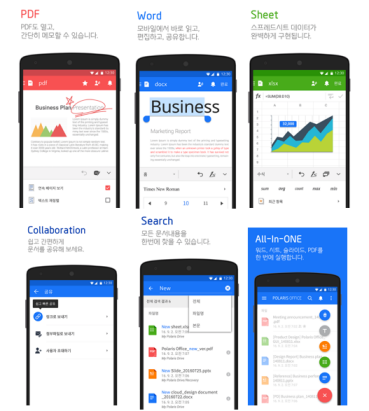

### Pandas DF index 지정
- 유저ID와 같은 유니크 값(primary key)를 인덱스로 지정하는 것이 편리함 (pandas 장점)
- 그렇지 않으면, 추후 scaling 이나 모델 학습 등을 할때 매번 슬라이싱으로 처리해야함 

In [9]:
df.set_index("iduser", inplace=True)

In [ ]:
df.head()

In [11]:
df.drop("mdutype", axis=1, inplace=True)

In [ ]:
# check missing values in each cols
df.isnull().sum().plot(kind='barh', color='darkblue', figsize=(15,8))

plt.title("Missing value counts")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 파일 저장

In [14]:
df.to_csv("data/testset2.csv")